In [51]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install 'aerosandbox[full]'

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


wpofhsdlafhalsdkfsdcjl;sadv;

below I am about to ac hieve the following and the following is that which I will ac
ieve below:

# markdown


In [52]:
import aerosandbox as asb
import aerosandbox.numpy as np

In [53]:
# Here, all distances are in meters and all angles are in degrees.
airplane = asb.Airplane(
    name="Example Airplane",
    xyz_ref=[0.5, 0, 0],  # Reference for moments
    s_ref=9,  # Reference area
    c_ref=0.9,  # Reference chord
    b_ref=10,  # Reference span
    wings=[
        asb.Wing(
            name="Wing",
            symmetric=True,  # Should this wing be mirrored across the XZ plane?
            xsecs=[  # The wing's cross ("X") sections, or "XSecs"
                asb.WingXSec(  # Root
                    xyz_le=[0, 0, .3],  # Coordinates of the XSec's leading edge
                    chord=1,
                    twist=1,  # in degrees
                    airfoil=asb.KulfanAirfoil(
                        "MyKulfanAirfoil", 
                        upper_weights=[0.1,1.0,1],
                        lower_weights=[0,0.1,0],
                    ),
                    control_surface_is_symmetric=False,  # Aileron
                    control_surface_deflection=45,  # in degrees
                    # (ctrl. surfs. are applied between this XSec and the next one.)
                ),
                asb.WingXSec(  # Tip
                    xyz_le=[0.2, 5, .3],
                    chord=0.6,
                    twist=-1,
                    airfoil=asb.KulfanAirfoil(
                        name="MyKulfanAirfoil", 
                        upper_weights=[0.1,2.0,1],
                        lower_weights=[0,0.1,0],
                        leading_edge_weight=1.0,
                        TE_thickness=0.0,
                        N1=1.0,
                        N2=1.0,

                    ),
                )
            ]
        ),
        asb.Wing(
            name="H-stab",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.7,
                    airfoil=asb.Airfoil("ht08")
                ),
                asb.WingXSec(
                    xyz_le=[0.14, 1.25, 0],
                    chord=0.42,
                    airfoil=asb.Airfoil("ht08")
                ),
            ]
        ).translate([4, 0, 0]), # Used to translate all cross sections of the wing.
        asb.Wing(
            name="V-stab",
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.7,
                    airfoil=asb.Airfoil("ht08"),
                    control_surfaces=[
                        asb.ControlSurface(
                            hinge_point=0.2,
                            trailing_edge=True,
                            deflection=45
                        )
                    ]
                ),
                asb.WingXSec(
                    xyz_le=[0.14, 0, 1],
                    chord=0.42,
                    airfoil=asb.Airfoil("ht08")
                )
            ]
        ).translate([4, 0, 0]), # Used to translate all cross sections of the wing.
    ],
    fuselages=[
        asb.Fuselage(
            name="Fuselage",
            xsecs=[
                asb.FuselageXSec(
                    xyz_c=[xi * 5 - 0.5, 0, 0],
                    radius=asb.Airfoil("naca0024").local_thickness(x_over_c=xi)
                )
                for xi in np.cosspace(0, 1, 30)
            ]
        )
    ]
)

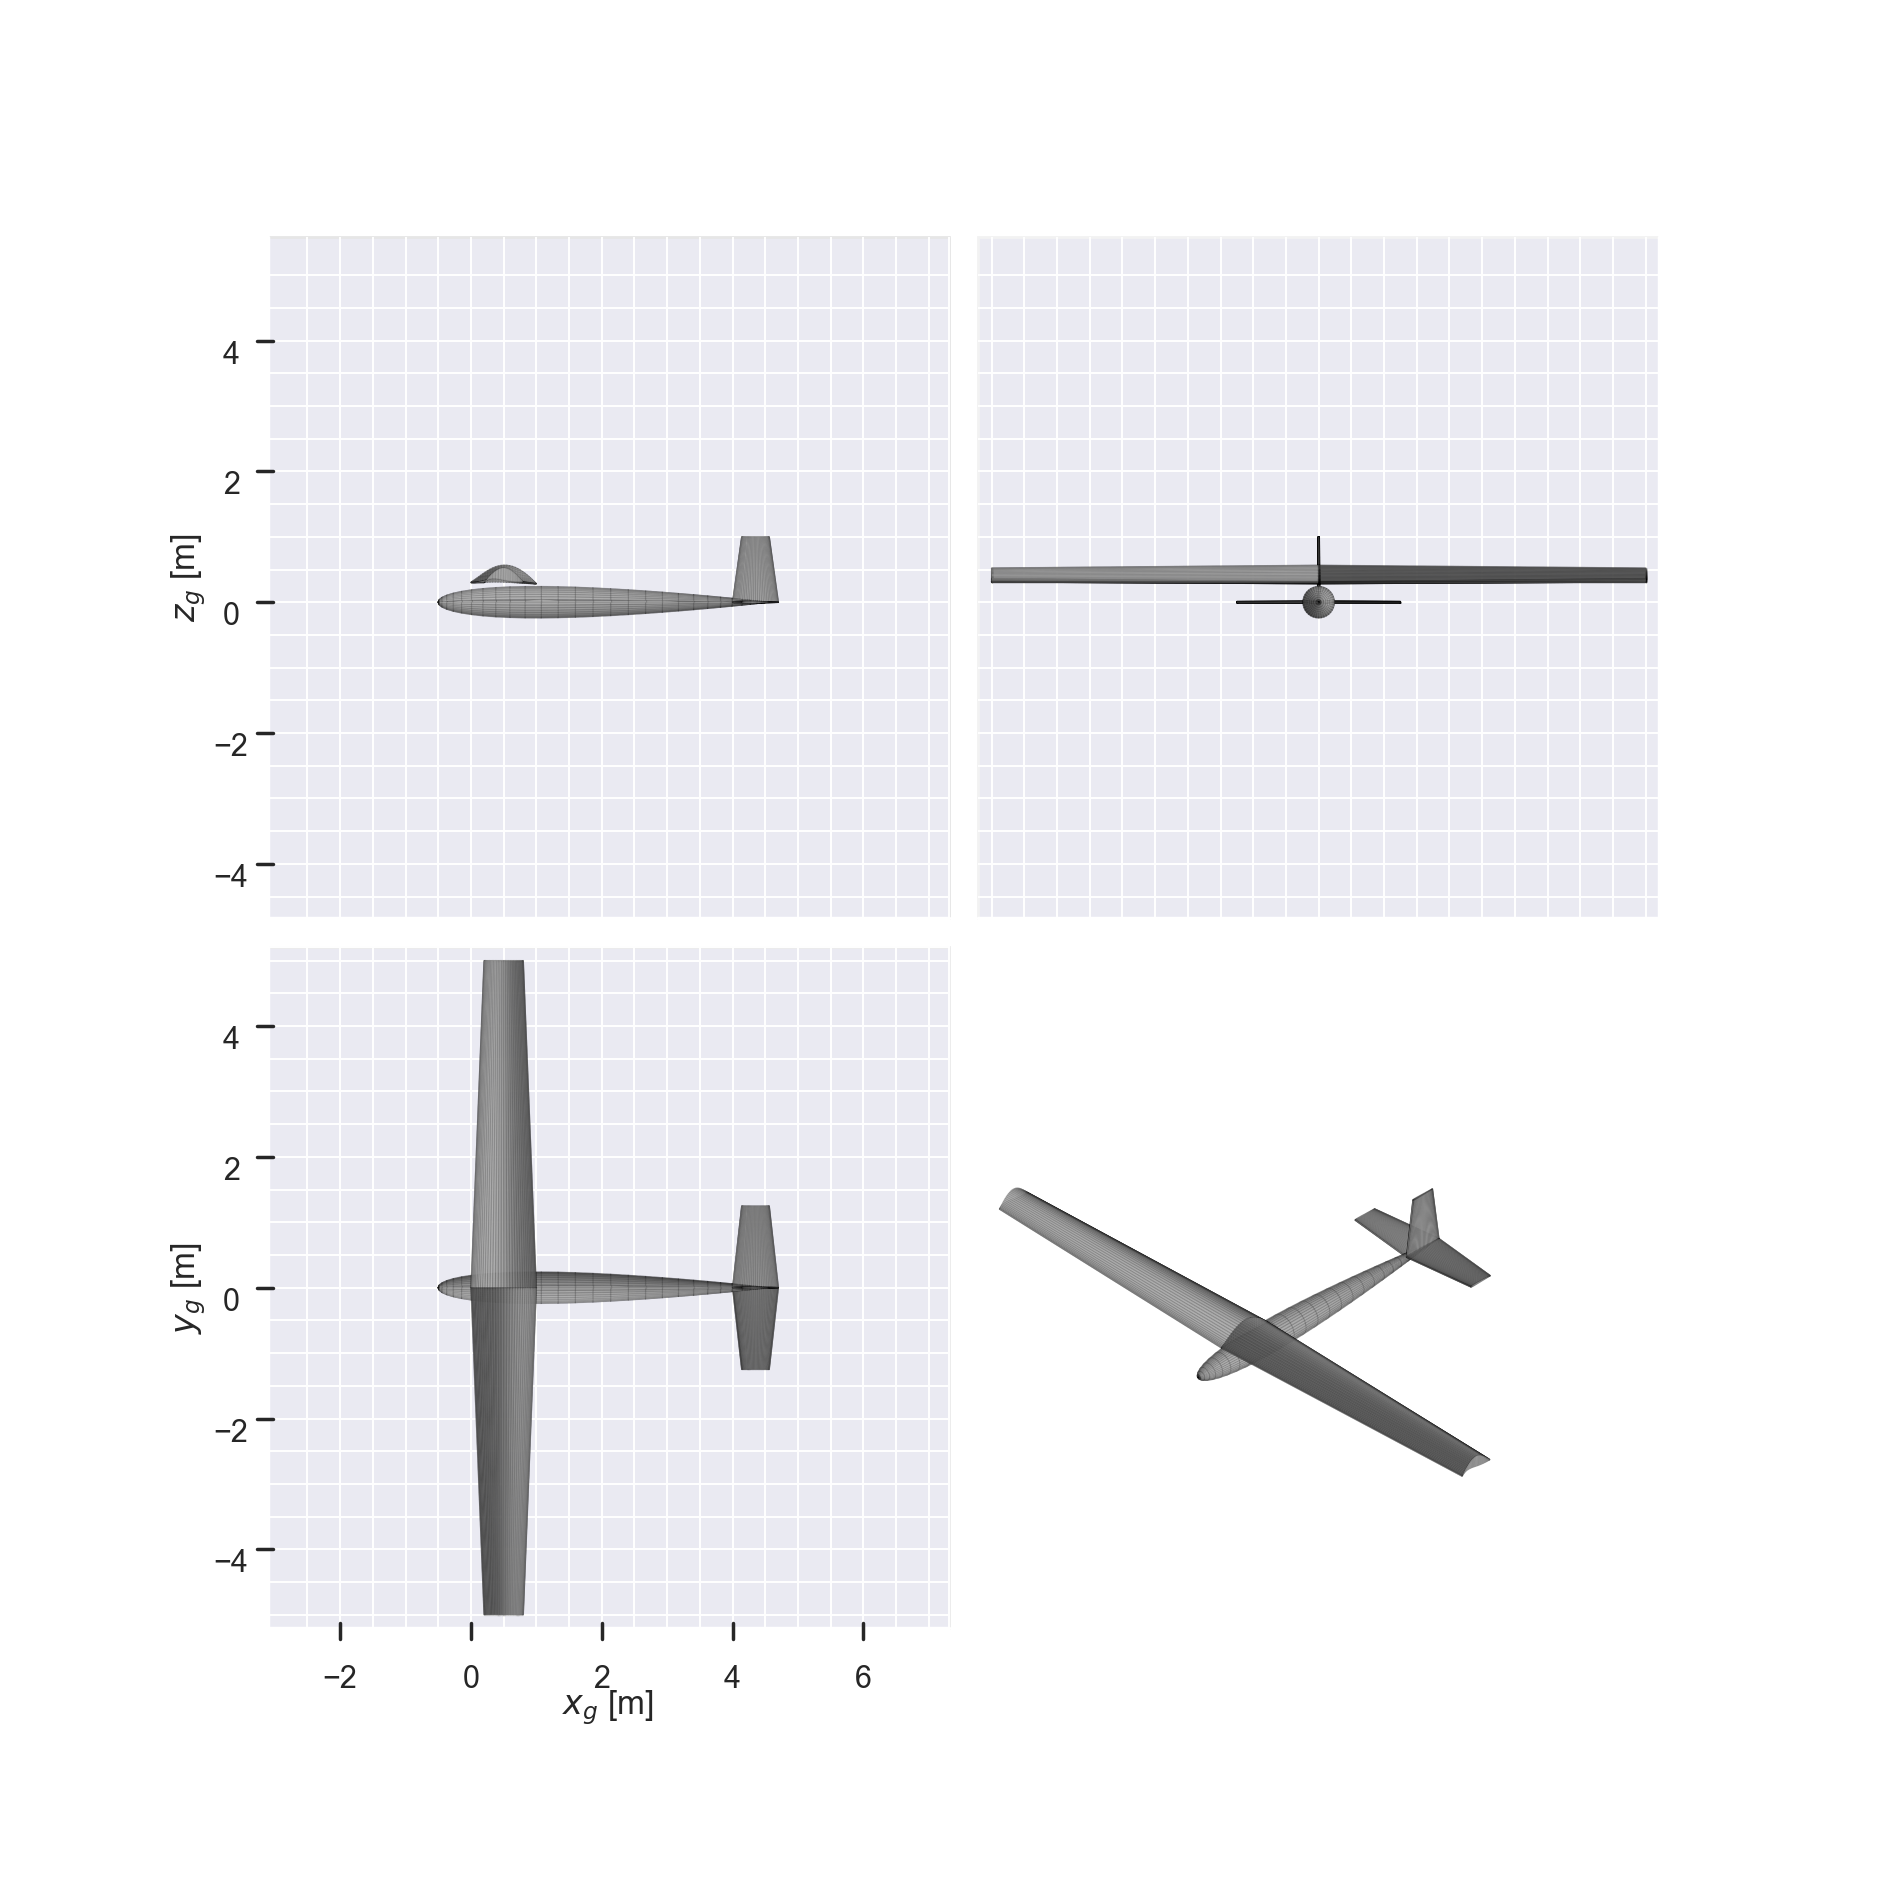

In [54]:
# Draw the plane
airplane.draw_three_view()

In [55]:
vlm = asb.VortexLatticeMethod(
    airplane=airplane,
    op_point=asb.OperatingPoint(
        velocity=25,  # m/s
        alpha=0,  # degree
    )
)
ab = asb.AeroBuildup(               # This sets up the analysis, but doesn't execute calculation
     airplane=airplane,             # type: asb.Airplane
     op_point=asb.OperatingPoint,   # type: asb.OperatingPoint
     xyz_ref=[0.1, 0.2, 0.3],       # Moment reference and center of rotation.
)

aero = vlm.run()  # Returns a dictionary
for k, v in aero.items():
    print(f"{k.rjust(4)} : {v}")


TypeError: can't multiply sequence by non-int of type 'numpy.float64'